## Problem 1
### Weiwei Zheng

In [30]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
%matplotlib notebook

a)

In [31]:
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [32]:
def z_tp1_func(z_t, epsilon, rho=0.85, mu=11.4):
    z_tp1 = rho * z_t + (1 - rho) * mu + epsilon
    return z_tp1

In [33]:
z_current = 11.4
z_tp1_vector = np.zeros(T)

for z_tp1_index in range(T):
    z_tp1 = z_tp1_func(z_t=z_current, epsilon=eps_vec[z_tp1_index])
    z_tp1_vector[z_tp1_index] = z_tp1
    z_current = z_tp1

<IPython.core.display.Javascript object>


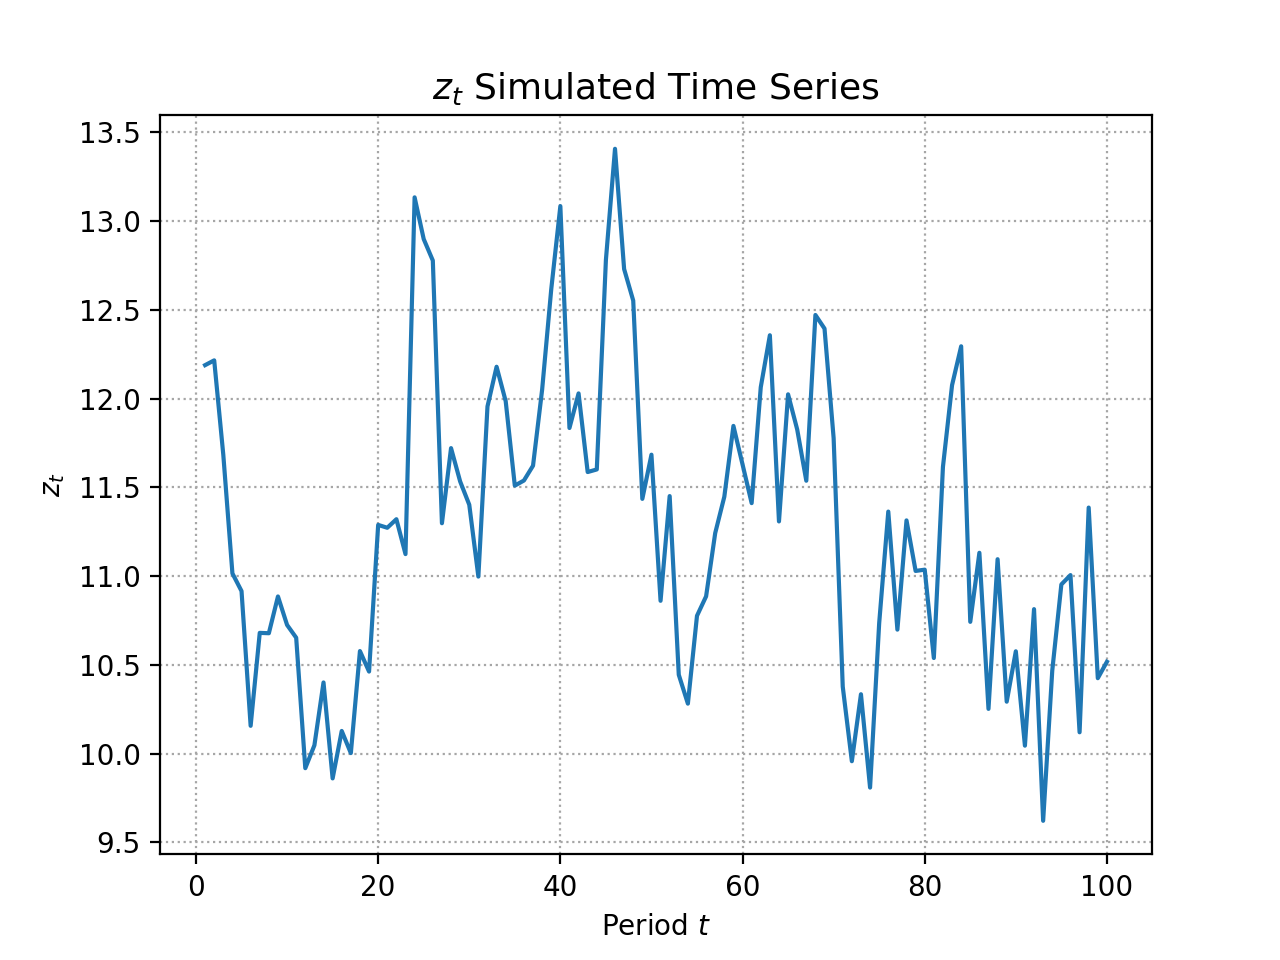

Text(0,0.5,'$z_t$')

In [34]:
periods_to_plot = 100
z_tp1_vector_truncated = z_tp1_vector[0:periods_to_plot]
plt.plot(np.arange(1, periods_to_plot + 1), z_tp1_vector_truncated, '-')
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'$z_t$ Simulated Time Series', fontsize=13)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$z_t$')

b)

In [35]:
z_t_mean = 11.4
z_t_std = 0.7

z_min = z_t_mean - 3 * z_t_std
z_low = z_min + ((z_t_mean - z_min) / 2)
z_max = z_t_mean + 3 * z_t_std
z_high = z_t_mean + ((z_max - z_t_mean) / 2) 

z_vals = np.array([z_min, z_low, z_t_mean, z_high, z_max])
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

c)

In [36]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]

In [37]:
z_cuts

array([ 9.825, 10.875, 11.925, 12.975])

In [38]:
def which_bin(z_value, z_cuts):
    """
    Which bin does a z_value fall into?
    """
    if z_value <= z_cuts[0]:
        return 1
    elif (z_cuts[0] < z_value) and (z_value <= z_cuts[1]):
        return 2
    elif (z_cuts[1] < z_value) and (z_value <= z_cuts[2]):
        return 3
    elif (z_cuts[2] < z_value) and (z_value <= z_cuts[3]):
        return 4
    elif (z_value > z_cuts[3]):
        return 5

In [39]:
transition_counts = np.zeros(shape=(5, 5), dtype=np.int16)

start_bin_counts = np.zeros(5, dtype=np.int16)

previous_bin_num = None
for ind in range(T):
    z_value = z_tp1_vector[ind]
    
    current_bin_num = which_bin(z_value=z_value, z_cuts=z_cuts)
    current_bin_ind = current_bin_num - 1
    if previous_bin_num:
        previous_bin_ind = previous_bin_num - 1
        transition_counts[previous_bin_ind][current_bin_ind] += 1
    
    start_bin_counts[current_bin_ind] += 1
        
    previous_bin_num = current_bin_num

In [40]:
print(start_bin_counts)
print("----------------------")
print(transition_counts)

[ 50 120 163 119  48]
----------------------
[[34 13  2  0  0]
 [11 66 39  4  0]
 [ 5 36 79 37  6]
 [ 0  5 41 60 13]
 [ 0  0  2 17 29]]


In [41]:
# Calculate the estimated P transition matrix:
P_hat_matrix = np.zeros(shape=(5, 5), dtype=np.float32)
P_hat_matrix

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
i = 0
j = 0
for i in range(5):
    for j in range(5):
        denom = start_bin_counts[i]
        numer = transition_counts[i][j]
        P_hat_matrix[i][j] = numer / denom

In [43]:
P_hat_matrix

array([[0.68      , 0.26      , 0.04      , 0.        , 0.        ],
       [0.09166667, 0.55      , 0.325     , 0.03333334, 0.        ],
       [0.03067485, 0.2208589 , 0.48466256, 0.22699386, 0.03680982],
       [0.        , 0.04201681, 0.34453782, 0.5042017 , 0.1092437 ],
       [0.        , 0.        , 0.04166667, 0.35416666, 0.6041667 ]],
      dtype=float32)

d)

In [44]:
x_0 = np.array([0, 0, 1, 0, 0])
x_row_u = np.dot(LA.matrix_power(P_hat_matrix.T, 3), x_0)
prob_bin5_given_bin3 = x_row_u[5-1]
print("Probability of being in bin 5 after 3 periods, starting with bin 3:\n", prob_bin5_given_bin3)

Probability of being in bin 5 after 3 periods, starting with bin 3:
 0.08021578192710876


e)

In [45]:
eigvals, eigvecmat = LA.eig(P_hat_matrix.T)
# Rounding:
eigvals = np.around(eigvals, decimals=2)

print("Eigenvalues (rounded):", eigvals)
print()
print("Eigenvectors:\n", eigvecmat)
print()
one_ind = np.argwhere(eigvals == 1).flatten()
print("Index of where Eigenvalue = 1:", one_ind)
print("\n")
eigvec = eigvecmat[:, one_ind] / eigvecmat[:, one_ind].sum()
stat_dist = eigvec
print("Long-run Ergodic Distribution of z_t (in proportion terms):\n", stat_dist)
print()
print("Long-run Ergodic Distribution of z_t (in percentage terms):\n", stat_dist * 100)

Eigenvalues (rounded): [1.   0.76 0.57 0.12 0.37]

Eigenvectors:
 [[-0.20667441 -0.5469676   0.49488944 -0.01777174 -0.17947128]
 [-0.49376178 -0.49935713 -0.37225124  0.3721658   0.68712676]
 [-0.66687065  0.0664635  -0.63412464 -0.78980196 -0.23814754]
 [-0.48014385  0.5399601   0.07822005  0.4846866  -0.5854097 ]
 [-0.19552593  0.39432797  0.4563782  -0.04968433  0.31020656]]

Index of where Eigenvalue = 1: [0]


Long-run Ergodic Distribution of z_t (in proportion terms):
 [[0.10116337]
 [0.24168743]
 [0.32642108]
 [0.23502171]
 [0.0957064 ]]

Long-run Ergodic Distribution of z_t (in percentage terms):
 [[10.116337]
 [24.168743]
 [32.64211 ]
 [23.50217 ]
 [ 9.57064 ]]


f)

In [46]:
zt_ind = 2
z_0 = z_vals[zt_ind]
z_vec = np.zeros(T)
z_t = z_0

for t_ind in range(T):
    # Calculate new index and new value
    ztp1_ind = np.argwhere(unif_vec[t_ind] <= np.cumsum(P_hat_matrix[zt_ind, :])).min()
    z_tp1 = z_vals[ztp1_ind]
    z_vec[t_ind] = z_tp1
    
    # Update the current value and its index in the loop
    z_t = z_tp1
    zt_ind = ztp1_ind

<IPython.core.display.Javascript object>


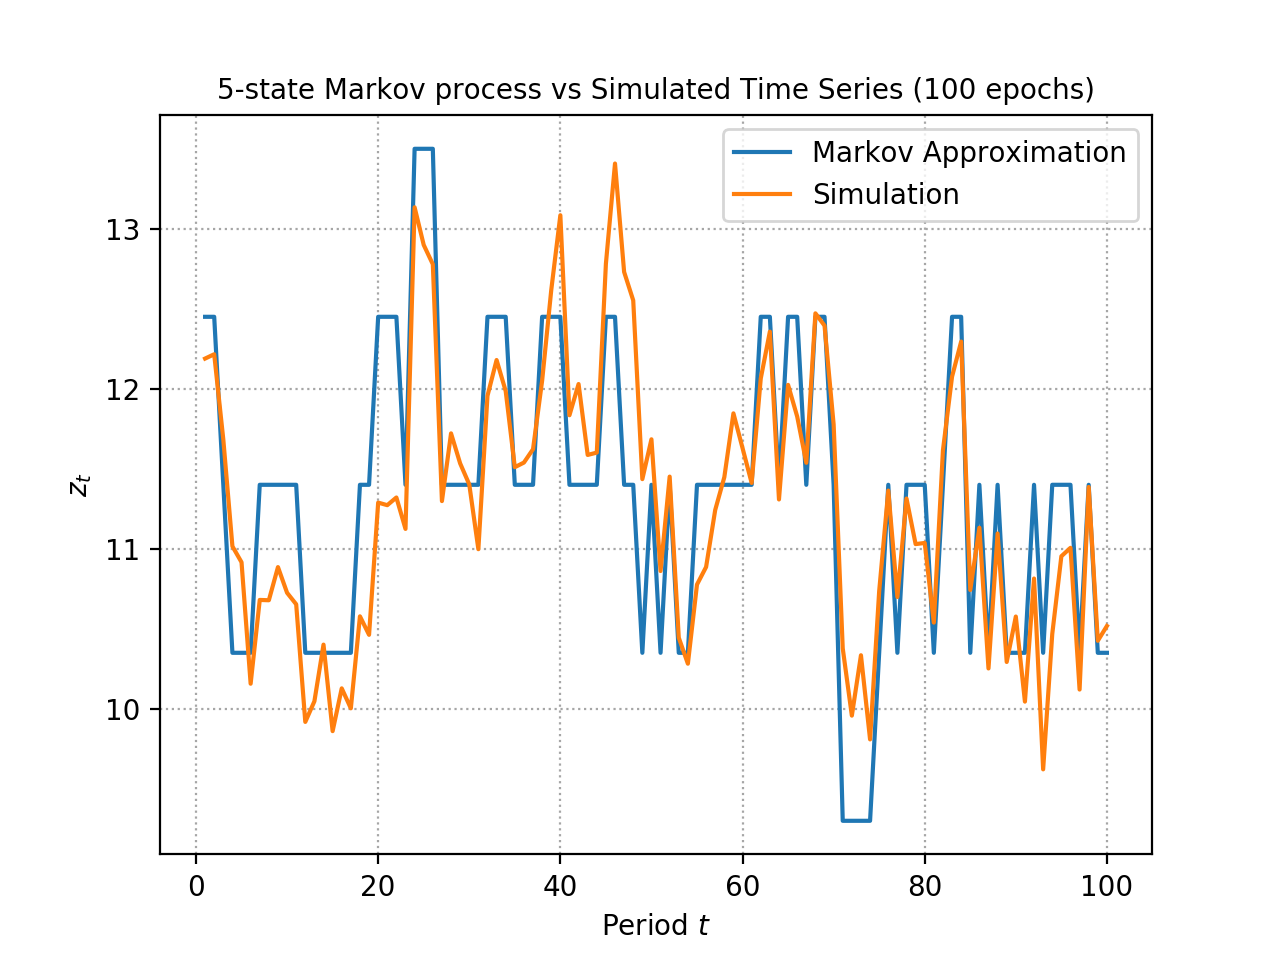

Text(0,0.5,'$z_t$')

In [49]:
# Plot the time series of z_t (100 epochs)
z_vector_truncated = z_vec[0:periods_to_plot]
plt.plot(np.arange(1, periods_to_plot + 1), z_vector_truncated, '-')
plt.plot(np.arange(1, periods_to_plot + 1), z_tp1_vector_truncated, '-')
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'5-state Markov process vs Simulated Time Series (100 epochs)', fontsize=10)
plt.legend(['Markov Approximation', 'Simulation'])
plt.xlabel(r'Period $t$')
plt.ylabel(r'$z_t$')

<IPython.core.display.Javascript object>


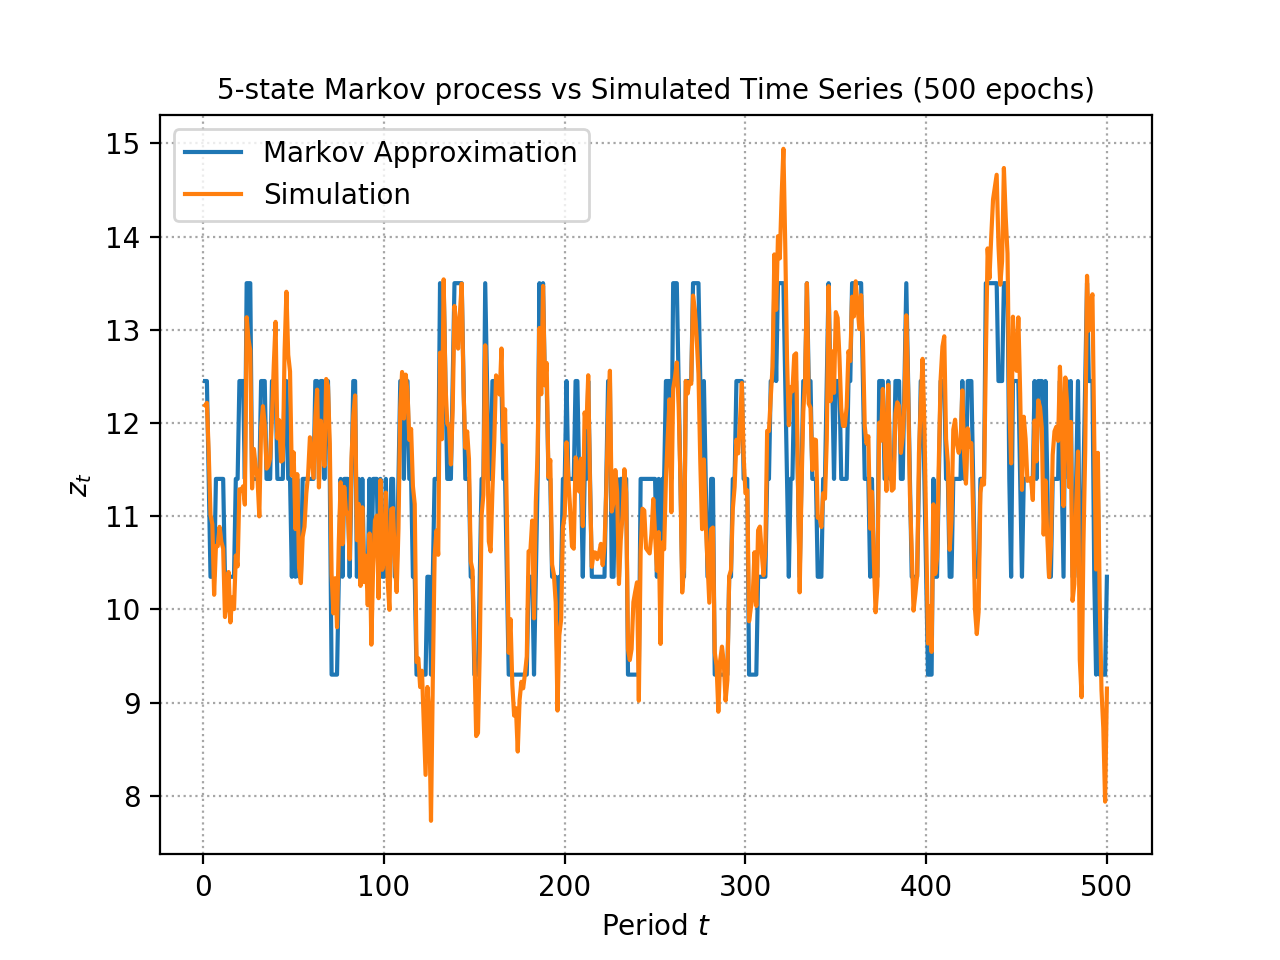

Text(0,0.5,'$z_t$')

In [50]:
# Plot the time series of z_t (all 500 epochs)
#z_vector_truncated = z_vec[0:periods_to_plot]
plt.plot(np.arange(1, 500 + 1), z_vec, '-')
plt.plot(np.arange(1, 500 + 1), z_tp1_vector, '-')
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'5-state Markov process vs Simulated Time Series (500 epochs)', fontsize=10)
plt.legend(['Markov Approximation', 'Simulation'])
plt.xlabel(r'Period $t$')
plt.ylabel(r'$z_t$')